In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

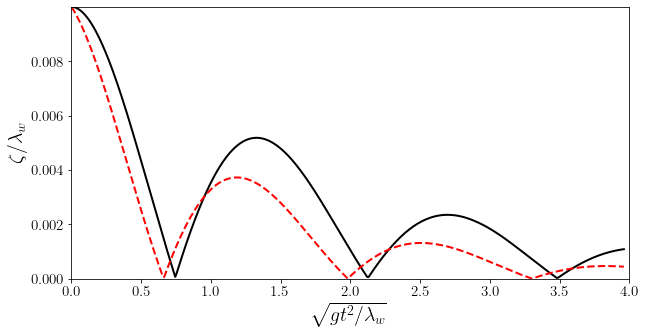

In [49]:
df = pd.read_csv('WavesWater/amplitude.dat', sep=' ')
df.head()
fig, ax = plt.subplots(1, 1, figsize=(10,5))

Ga = 1e4
t = df['t']
Amp = df['Amp']
A0 = Amp[0]

ax.plot(t, Amp, 'k-', lw=2)

omega = np.sqrt(2*np.pi)
W = np.sqrt((omega)**2 - (4/Ga)*(2*np.pi)**4)
Ath = A0*np.exp(-(2/np.sqrt(Ga))*((2*np.pi)**2)*t)*np.cos(W*t)

ax.plot(t, abs(Ath), 'r--', lw=2)

ax.set_xlabel(r'$\sqrt{gt^2/\lambda_w}$', fontsize=20)
ax.set_ylabel(r'$\zeta/\lambda_w$', fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=15)

ax.set_xlim([0., 4.0])
ax.set_ylim([0., A0])

# ax.set_xscale('log')

plt.show()